# **Understanding the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('/content/AB_NYC_2019 5.csv')

In [3]:
df.shape

(48895, 16)

# **Data cleaning**

In [4]:
# Understanding types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#about the unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [6]:
# checking duplicatd values.
df.duplicated().sum()

0

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.drop(['name', 'id', 'host_name', 'last_review'], axis=1, inplace=True)

In [10]:
df.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [11]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Analysis**

In [12]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [13]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [15]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

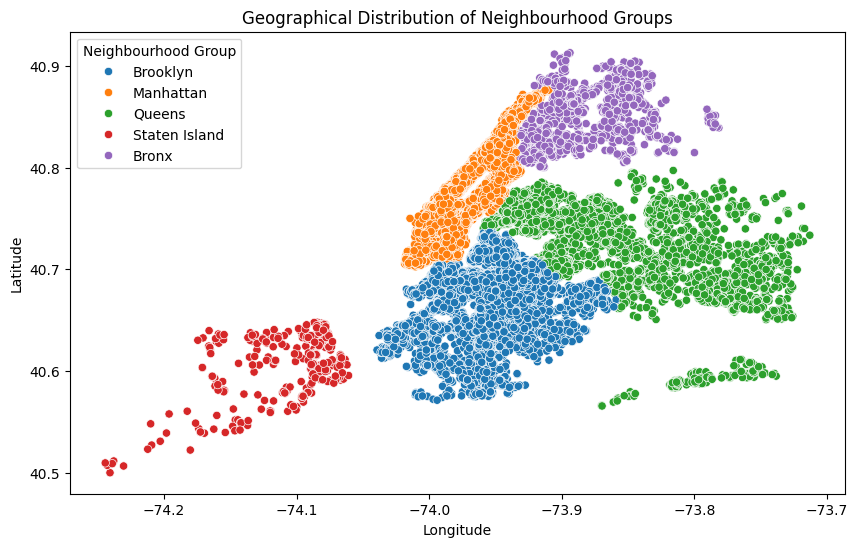

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.title('Geographical Distribution of Neighbourhood Groups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.show()

In [17]:
df['neighbourhood'].value_counts().iloc[:5]

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: count, dtype: int64

In [18]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

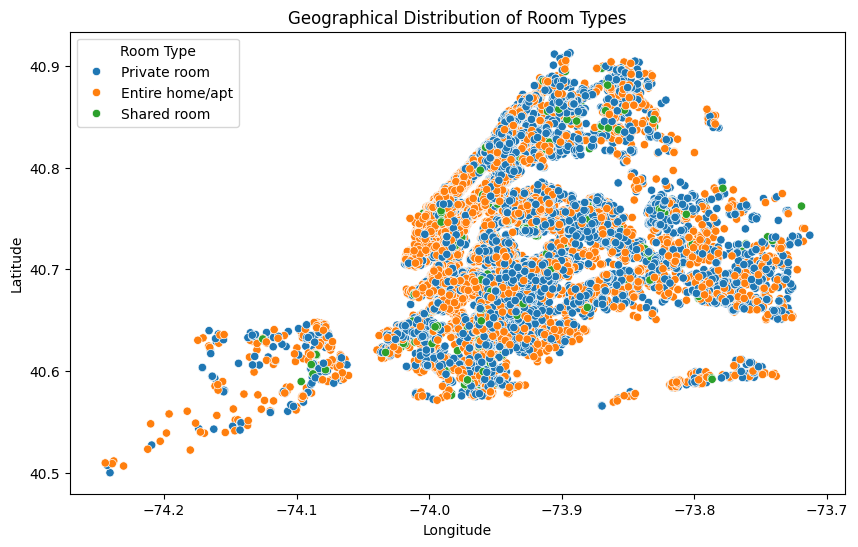

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df)
plt.title('Geographical Distribution of Room Types')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type')
plt.show()

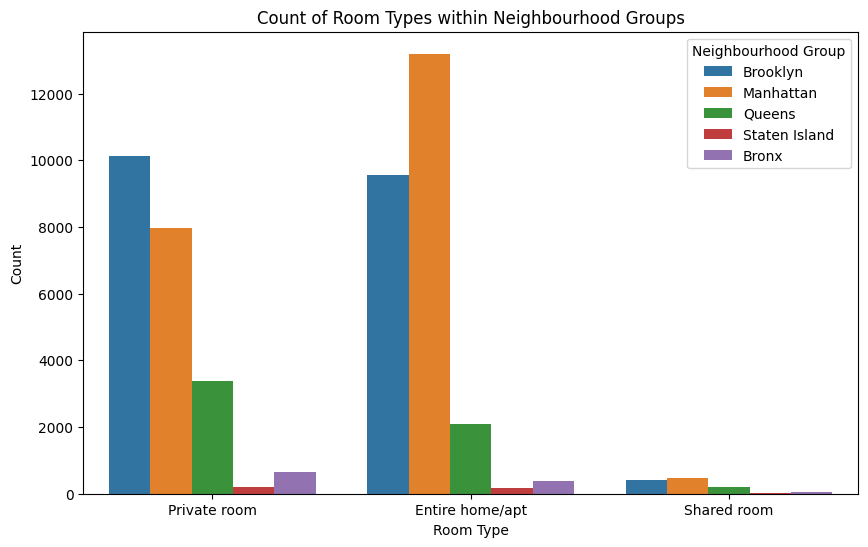

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', hue='neighbourhood_group')
plt.title('Count of Room Types within Neighbourhood Groups')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Neighbourhood Group')
plt.show()

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

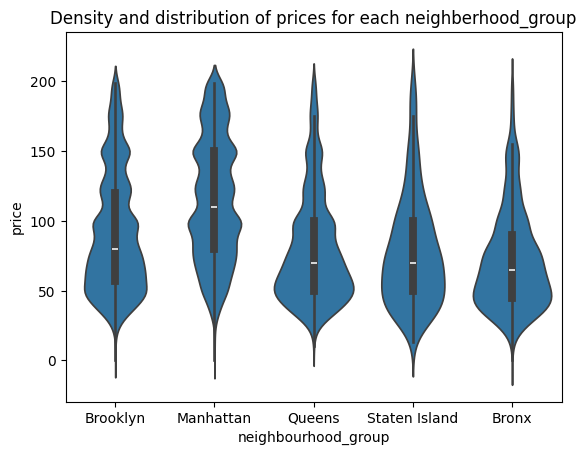

In [22]:
v2=sns.violinplot(data=df[df.price < 200], x='neighbourhood_group', y='price')
v2.set_title('Density and distribution of prices for each neighberhood_group')

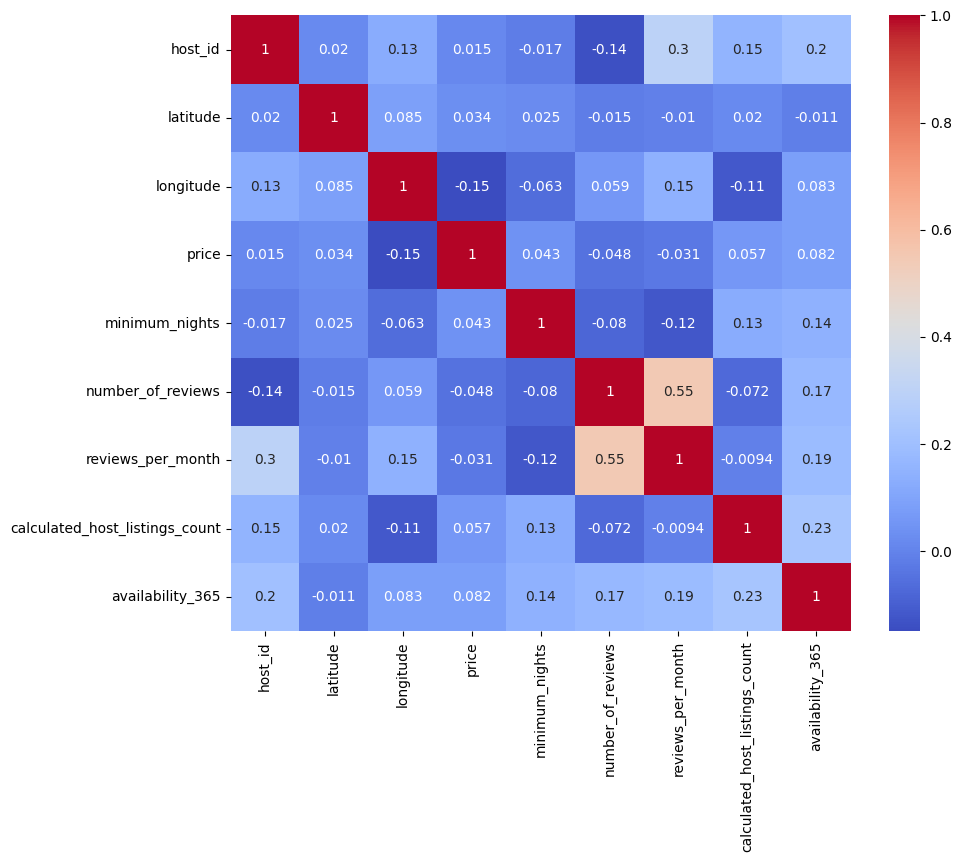

In [109]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# **Spliting the data for training and testing**

In [25]:
X = df[['neighbourhood_group', 'neighbourhood']]
y = df['room_type']

In [24]:
X.fillna(0, inplace=True)

In [27]:
X_encoded = pd.get_dummies(X, columns=['neighbourhood_group', 'neighbourhood'], drop_first=True)

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape, X_test.shape

((34226, 224), (14669, 224))

In [31]:
y_train.shape, y_test.shape

((34226,), (14669,))

# **Machine learning model**

**Linear kernel**

In [58]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [59]:
y_pred_linear = svm_linear.predict(X_test)

In [37]:
# Converting y_test and y_pred_linear to string
y_test = y_test.astype(str)
y_pred_linear = y_pred_linear.astype(str)

In [61]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear Kernel - Accuracy:", accuracy_linear)

Linear Kernel - Accuracy: 0.6153793714636308


In [62]:
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix (Linear Kernel):")
print(conf_matrix_linear)

Confusion Matrix (Linear Kernel):
[[4428 3201    0]
 [2095 4599    1]
 [ 125  220    0]]


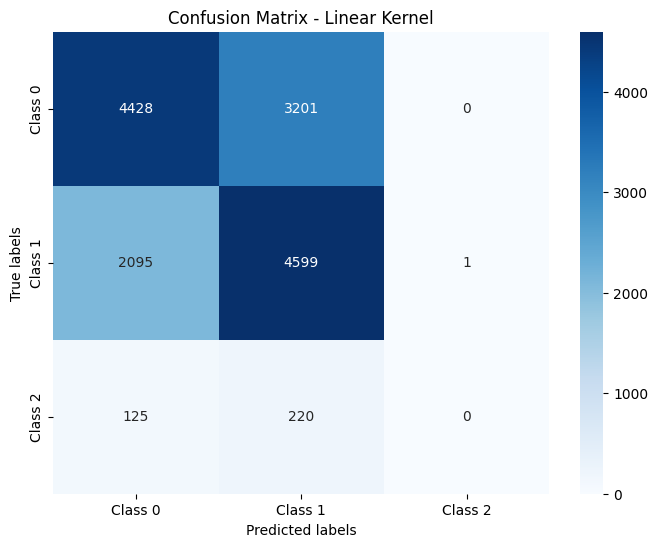

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Linear Kernel')
plt.show()

In [63]:
linear_report = classification_report(y_test, y_pred_linear)
print("Classification Report (Linear Kernel):")
print(linear_report)

Classification Report (Linear Kernel):
                 precision    recall  f1-score   support

Entire home/apt       0.67      0.58      0.62      7629
   Private room       0.57      0.69      0.63      6695
    Shared room       0.00      0.00      0.00       345

       accuracy                           0.62     14669
      macro avg       0.41      0.42      0.42     14669
   weighted avg       0.61      0.62      0.61     14669



**Polynomial Kernel**

In [79]:
svm_poly = SVC(kernel='poly', degree=4, C=1.0, random_state=42)
svm_poly.fit(X_train, y_train)

SVC(degree=4, kernel='poly', random_state=42)

In [80]:
y_pred_poly = svm_poly.predict(X_test)

In [81]:
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Polynomial Kernel - Accuracy:", accuracy_poly)

Polynomial Kernel - Accuracy: 0.5593428318222101


In [48]:
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)
print("Confusion Matrix (Polynomial Kernel):")
print(conf_matrix_poly)

Confusion Matrix (Polynomial Kernel):
[[6032 1597    0]
 [4048 2646    1]
 [ 185  160    0]]


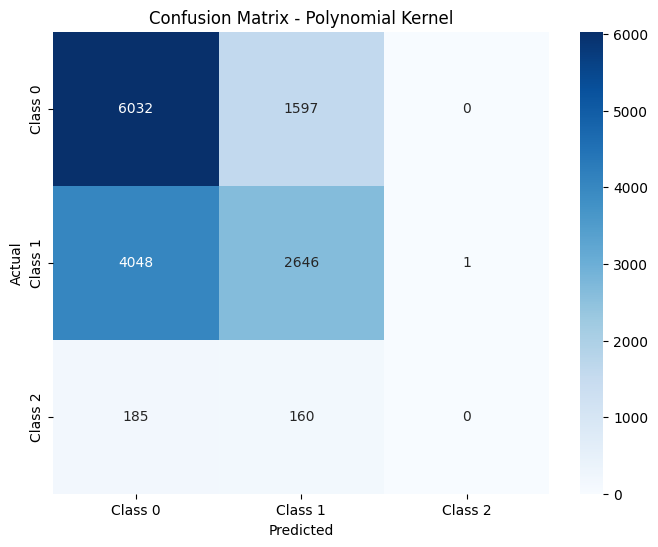

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_poly, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Polynomial Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
report_poly = classification_report(y_test, y_pred_poly)
print("Classification Report (Polynomial Kernel):")
print(report_poly)

Classification Report (Polynomial Kernel):
                 precision    recall  f1-score   support

Entire home/apt       0.59      0.79      0.67      7629
   Private room       0.60      0.40      0.48      6695
    Shared room       0.00      0.00      0.00       345

       accuracy                           0.59     14669
      macro avg       0.40      0.40      0.38     14669
   weighted avg       0.58      0.59      0.57     14669



**Radial Basis Function (RBF) kernel**

In [82]:
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1.0, random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [83]:
y_pred_rbf = svm_rbf.predict(X_test)

In [84]:
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel - Accuracy:", accuracy_rbf)

RBF Kernel - Accuracy: 0.6153793714636308


In [55]:
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix (RBF Kernel):")
print(conf_matrix_rbf)

Confusion Matrix (RBF Kernel):
[[4428 3201    0]
 [2095 4599    1]
 [ 125  220    0]]


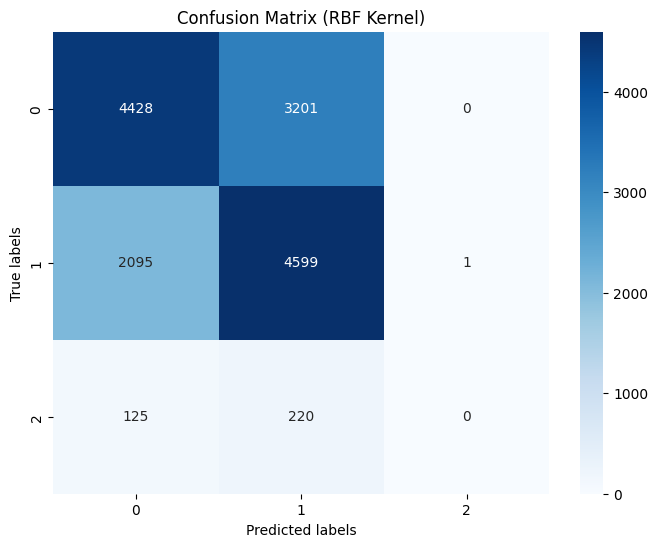

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rbf, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (RBF Kernel)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [57]:
report_rbf = classification_report(y_test, y_pred_rbf)
print("Classification Report (RBF Kernel):")
print(report_rbf)

Classification Report (RBF Kernel):
                 precision    recall  f1-score   support

Entire home/apt       0.67      0.58      0.62      7629
   Private room       0.57      0.69      0.63      6695
    Shared room       0.00      0.00      0.00       345

       accuracy                           0.62     14669
      macro avg       0.41      0.42      0.42     14669
   weighted avg       0.61      0.62      0.61     14669



**Printing the accuracy of the three kernels**

In [85]:
print("Linear Kernel - Accuracy:", accuracy_linear)
print("Polynomial Kernel - Accuracy:", accuracy_poly)
print("RBF Kernel - Accuracy:", accuracy_rbf)

Linear Kernel - Accuracy: 0.6153793714636308
Polynomial Kernel - Accuracy: 0.5593428318222101
RBF Kernel - Accuracy: 0.6153793714636308


# **Tuning the model**

In [86]:
# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'C': [1.0],
    'gamma': ['auto'],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [4]  # Only for 'polynomial' kernel
}

In [87]:
svm_random = RandomizedSearchCV(SVC(), param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

In [88]:
svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1.0], 'degree': [4],
                                        'gamma': ['auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=42, scoring='accuracy')

In [89]:
# Printing the best parameters
print("Best Parameters (Randomized Search):", svm_random.best_params_)

Best Parameters (Randomized Search): {'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'C': 1.0}


In [93]:
best_svm_random = svm_random.best_estimator_

In [91]:
y_pred_best_random = best_svm_random.predict(X_test)

In [94]:
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
conf_matrix_best_random = confusion_matrix(y_test, y_pred_best_random)
report_best_random = classification_report(y_test, y_pred_best_random)

In [95]:
# Get the name of the best model
best_model_name = best_svm_random.__class__.__name__

In [96]:
print("Name of the Best Model:", best_model_name)

Name of the Best Model: SVC


In [97]:
best_kernel_name = best_svm_random.kernel

In [98]:
print("Name of the Best Kernel:", best_kernel_name)

Name of the Best Kernel: linear


In [99]:
print("Best Model (Kernel: {}) - Accuracy: {:.2f}".format(best_kernel_name, accuracy_best_random))

Best Model (Kernel: linear) - Accuracy: 0.62


In [100]:
# Calculate the confusion matrix
conf_matrix_best_random = confusion_matrix(y_test, y_pred_best_random)

In [101]:
print("Confusion Matrix (Best Model - Kernel: {}):".format(best_kernel_name))
print(conf_matrix_best_random)

Confusion Matrix (Best Model - Kernel: linear):
[[4428 3201    0]
 [2095 4599    1]
 [ 125  220    0]]


In [102]:
report_best_random = classification_report(y_test, y_pred_best_random)

In [103]:
print("Classification Report (Best Model - Kernel: {}):".format(best_kernel_name))
print(report_best_random)

Classification Report (Best Model - Kernel: linear):
                 precision    recall  f1-score   support

Entire home/apt       0.67      0.58      0.62      7629
   Private room       0.57      0.69      0.63      6695
    Shared room       0.00      0.00      0.00       345

       accuracy                           0.62     14669
      macro avg       0.41      0.42      0.42     14669
   weighted avg       0.61      0.62      0.61     14669

